In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../setigen")
import setigen as stg

# tsamp = 1.0
# fch1 = 6095.214842353016
# df = -1.0e-06

tsamp = 1.4316557653333333
fch1 = 3751.464843051508
df = -1.3969838619232178e-06

fchans = 1024
tchans = 32

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

In [2]:
fn = '/datax/scratch/bbrzycki/data/observations/blc15_guppi_58362_03640_DIAG_SGR_B2_0068.rawspec.0000.fil'

In [3]:
read_header(fn)

{b'machine_id': 20,
 b'telescope_id': 6,
 b'src_raj': <Angle 17.789 hourangle>,
 b'src_dej': <Angle -28.3853 deg>,
 b'az_start': 0.0,
 b'za_start': 0.0,
 b'data_type': 1,
 b'fch1': 6376.46484375,
 b'foff': -1.3969838619232178e-06,
 b'nchans': 134217728,
 b'nbeams': 1,
 b'ibeam': -1,
 b'nbits': 32,
 b'tstart': 58362.042129629626,
 b'tsamp': 1.431655765333332,
 b'nifs': 1,
 b'source_name': b'DIAG_SGR_B2',
 b'rawdatafile': b'blc15_guppi_58362_03640_DIAG_SGR_B2_0068.0000.raw'}

In [5]:
fil = Waterfall(fn, f_start=6664., f_stop=6672.)
fil.plot_waterfall()

blimpy.file_wrapper WARNING  Setting f_start = 6188.964844, since f_start not given or not valid.
blimpy.file_wrapper WARNING  Setting f_stop = 6376.464844, since f_stop not given or not valid.
blimpy.file_wrapper WARNING  Selection size of 21.00 GB, exceeding our size limit 1.00 GB. Instance created, header loaded, but data not loaded, please try another (t,v) selection.


IndexError: too many indices for array

In [ ]:
index = 0
while True:
    fch1 = read_header(fn)[b'fch1']

    fchans = 1024*4

    f_stop = fch1 + (index - 0) * fchans * df
    f_start = fch1 + (index + 1 - 0) * fchans * df

    # print(f_start, f_stop)
    frame = stg.get_data(Waterfall(fn, f_start=f_start, f_stop=f_stop))

    if max([max(y) for y in frame]) != 0.0:
        print(index)
        
    index += 1
# print(frame)
# plt.imshow(frame, aspect='auto')
# plt.show()
# normalized = stg.normalize(frame, cols = 0, exclude = 0.2, use_median=False)
# plt.imshow(normalized, aspect='auto')
# plt.imsave('temp_observation.png', normalized)
# plt.colorbar()

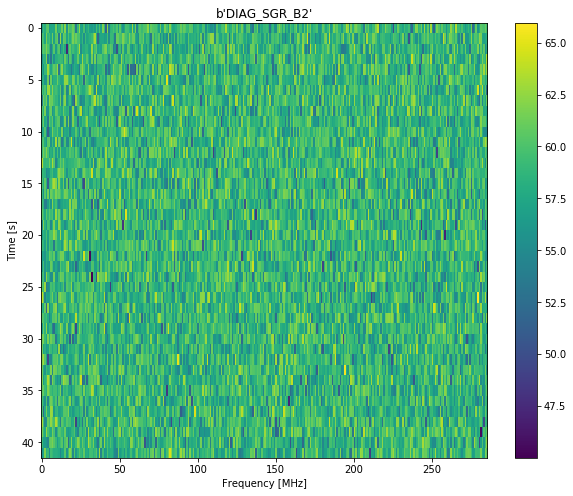

In [40]:
fn = '/datax/scratch/bbrzycki/data/observations/blc15_guppi_58362_03640_DIAG_SGR_B2_0068.rawspec.0000.fil'

fig = plt.figure(figsize=(10,8))
fil = Waterfall(fn, f_start=6367.675824, f_stop=6367.676224)
fil.plot_waterfall()

frame = stg.get_data(fil)
normalized = stg.normalize(np.log(frame), cols = 128, exclude = 0.2, use_median=False)
plt.imshow(normalized, aspect='auto')

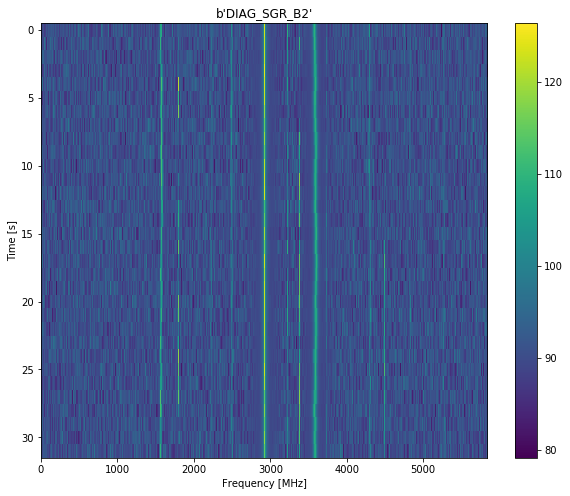

In [39]:
fn = '/datax/scratch/bbrzycki/data/blc00_guppi_58331_12383_DIAG_SGR_B2_0014.gpuspec.0000.fil'
fig = plt.figure(figsize=(10,8))
fil = Waterfall(fn, f_start=3150.291513, f_stop=3150.307830)
fil.plot_waterfall()
frame = stg.get_data(fil)
normalized = stg.normalize(np.log(frame), cols = 128, exclude = 0.2, use_median=False)
plt.imshow(normalized, aspect='auto')

(42, 1024)
Max is: 3454870.5


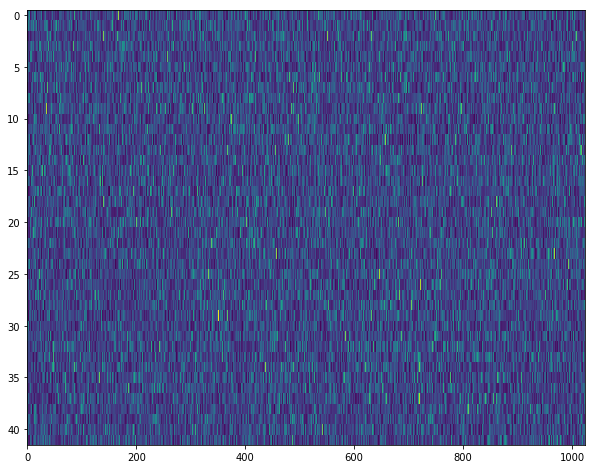

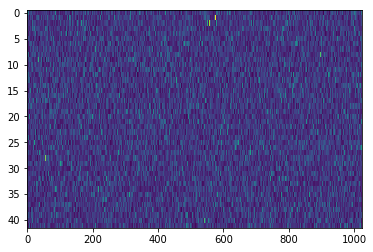

In [5]:
index = 0
fch1 = read_header(fn)[b'fch1']

fchans = 1024

f_stop = fch1 + (index - 0) * fchans * df
f_start = fch1 + (index + 1 - 0) * fchans * df

# print(f_start, f_stop)
frame = stg.get_data(Waterfall(fn, f_start=f_start, f_stop=f_stop))

max_value = max([max(y) for y in frame])

print(frame.shape)

print('Max is: %s' % max_value)
fig = plt.figure(figsize=(10,8))
plt.imshow(frame, aspect='auto')
plt.show()
normalized = stg.normalize(frame, cols = 0, exclude = 0.2, use_median=False)
plt.imshow(normalized, aspect='auto')
plt.imsave('temp_observation.png', normalized)


In [12]:
fil = Waterfall(fn, f_start=f_start, f_stop=f_stop)

In [16]:
fil.data

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)